In [1]:
import os
import numpy as np
from scipy.optimize import nnls
from pbwrap.utils import open_image

# Load example image

In [2]:
PATH = "/home/floric/Documents/fish_images/AF_eraser/Data_Carolina/"
images_filenames = os.listdir(PATH)
images_filenames


['scan_006_CPS1_CDKN1A_002_ROI.tif #2.tif',
 'signal15.tif',
 'signal11.tif',
 'signal18.tif',
 'signal.tif',
 'signal4.tif',
 'scan_006_dis_ASS1_CTNNB1_002_ROI.tif #3.tif',
 'scan_006_dis_2F2_CCND1_002_ROI.tif #3.tif',
 'signal24.tif',
 'scan_007_dis_CPS_CDKN1A_002_ROI.tif #2.tif',
 'signal0.tif',
 'signal16.tif',
 'signal20.tif',
 'signal14.tif',
 'signal10.tif',
 'scan_007_dis_CPS_CDKN1A_002_ROI.tif #3.tif',
 'signal21.tif',
 'signal6.tif',
 'signal9.tif',
 'signal13.tif',
 'signal26.tif',
 'scan_006_dis_2F2_CCND1_002_ROI.tif #2.tif',
 'signal7.tif',
 'scan_006_ASS1_CTNNB1_002_ROI.tif #2.tif',
 'signal25.tif',
 'signal28.tif',
 'signal2.tif',
 'signal22.tif',
 'signal3.tif',
 'scan_006_dis_ASS1_CTNNB1_002_ROI.tif #2.tif',
 'af.tif',
 'signal29.tif',
 'signal12.tif',
 'signal17.tif',
 'signal8.tif',
 'signal19.tif',
 'signal5.tif',
 'signal1.tif',
 'scan_006_CPS1_CDKN1A_002_ROI.tif #3.tif',
 'scan_006_ASS1_CTNNB1_002_ROI.tif #3.tif',
 'signal27.tif',
 'signal23.tif']

In [3]:
signal_filename = 'scan_006_ASS1_CTNNB1_002_ROI.tif #3.tif'
af_filename = 'scan_006_dis_ASS1_CTNNB1_002_ROI.tif #3.tif'

In [4]:
signal_image = open_image(PATH + signal_filename)[:,:800,:800].squeeze()
af_image = open_image(PATH + af_filename)[:,:800,:800].squeeze()

signal_image.shape, af_image.shape

((65, 800, 800), (65, 800, 800))

In [5]:
images = [signal_image, af_image]

# API testing

In [6]:
from NMF import remove_autofluorescence_NMF
from NMF import (
    _estimate_target_matrix,
    _apply_gaussian_filter_on_target_matrix,
    _acess_convergence,
    _compute_error,
    _extract_resulting_signals,
    _estimate_coef_and_darkcurrent,
    _initialize_matrix,
    
)

In [7]:
signal, af, residuals = remove_autofluorescence_NMF(
    images= images,
    exposure_time = 100,
    gaussian_kernel = 5,
    max_iteration=50
)

shape :  (65, 800, 800)
decomposed_signal_matrix, shape :  (2, 41600000)
iter :  0


B and D estimate: 100%|██████████| 2/2 [00:02<00:00,  1.45s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  1


B and D estimate: 100%|██████████| 2/2 [00:02<00:00,  1.39s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  2


B and D estimate: 100%|██████████| 2/2 [00:02<00:00,  1.43s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  3


B and D estimate: 100%|██████████| 2/2 [00:02<00:00,  1.34s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  4


B and D estimate: 100%|██████████| 2/2 [00:02<00:00,  1.39s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  5


B and D estimate: 100%|██████████| 2/2 [00:02<00:00,  1.39s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  6


B and D estimate: 100%|██████████| 2/2 [00:02<00:00,  1.43s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  7


B and D estimate: 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  8


B and D estimate: 100%|██████████| 2/2 [00:02<00:00,  1.49s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  9


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  10


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.68s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  11


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  12


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  13


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  14


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  15


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  16


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.53s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  17


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  18


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  19


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  20


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  21


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.70s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  22


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  23


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  24


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  25


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.62s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  26


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  27


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  28


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.60s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  29


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  30


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.52s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  31


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  32


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.59s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  33


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.56s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  34


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.54s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  35


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.55s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  36


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.61s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  37


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.57s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  38


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.58s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  39


B and D estimate: 100%|██████████| 2/2 [00:02<00:00,  1.47s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  40


B and D estimate: 100%|██████████| 2/2 [00:02<00:00,  1.48s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  41


B and D estimate: 100%|██████████| 2/2 [00:02<00:00,  1.43s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  42


B and D estimate: 100%|██████████| 2/2 [00:02<00:00,  1.44s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  43


B and D estimate: 100%|██████████| 2/2 [00:02<00:00,  1.44s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  44


B and D estimate: 100%|██████████| 2/2 [00:02<00:00,  1.49s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  45


B and D estimate: 100%|██████████| 2/2 [00:02<00:00,  1.44s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  46


B and D estimate: 100%|██████████| 2/2 [00:02<00:00,  1.46s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  47


B and D estimate: 100%|██████████| 2/2 [00:02<00:00,  1.43s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  48


B and D estimate: 100%|██████████| 2/2 [00:02<00:00,  1.45s/it]


decomposed_signal_matrix, shape :  (2, 41600000)
iter :  49


B and D estimate: 100%|██████████| 2/2 [00:03<00:00,  1.63s/it]


shape :  (65, 800, 800)
decomposed_signal_matrix, shape :  (2, 41600000)


# Output results

In [8]:
import bigfish.stack as stack
stack.save_image(signal, PATH + "/signal.tif")
stack.save_image(af, PATH + "/af.tif")

# Napari results

In [9]:
%gui qt
import napari

In [10]:
Viewer = napari.Viewer()
Viewer.add_image(signal)

<Image layer 'signal' at 0x7eaa94d30500>

# Residual plot

In [11]:
import matplotlib.pyplot as plt

In [12]:
residuals.keys()

dict_keys(['decomposed_signal_matrix', 'dark_current_matrix', 'linear_coef_matrix'])

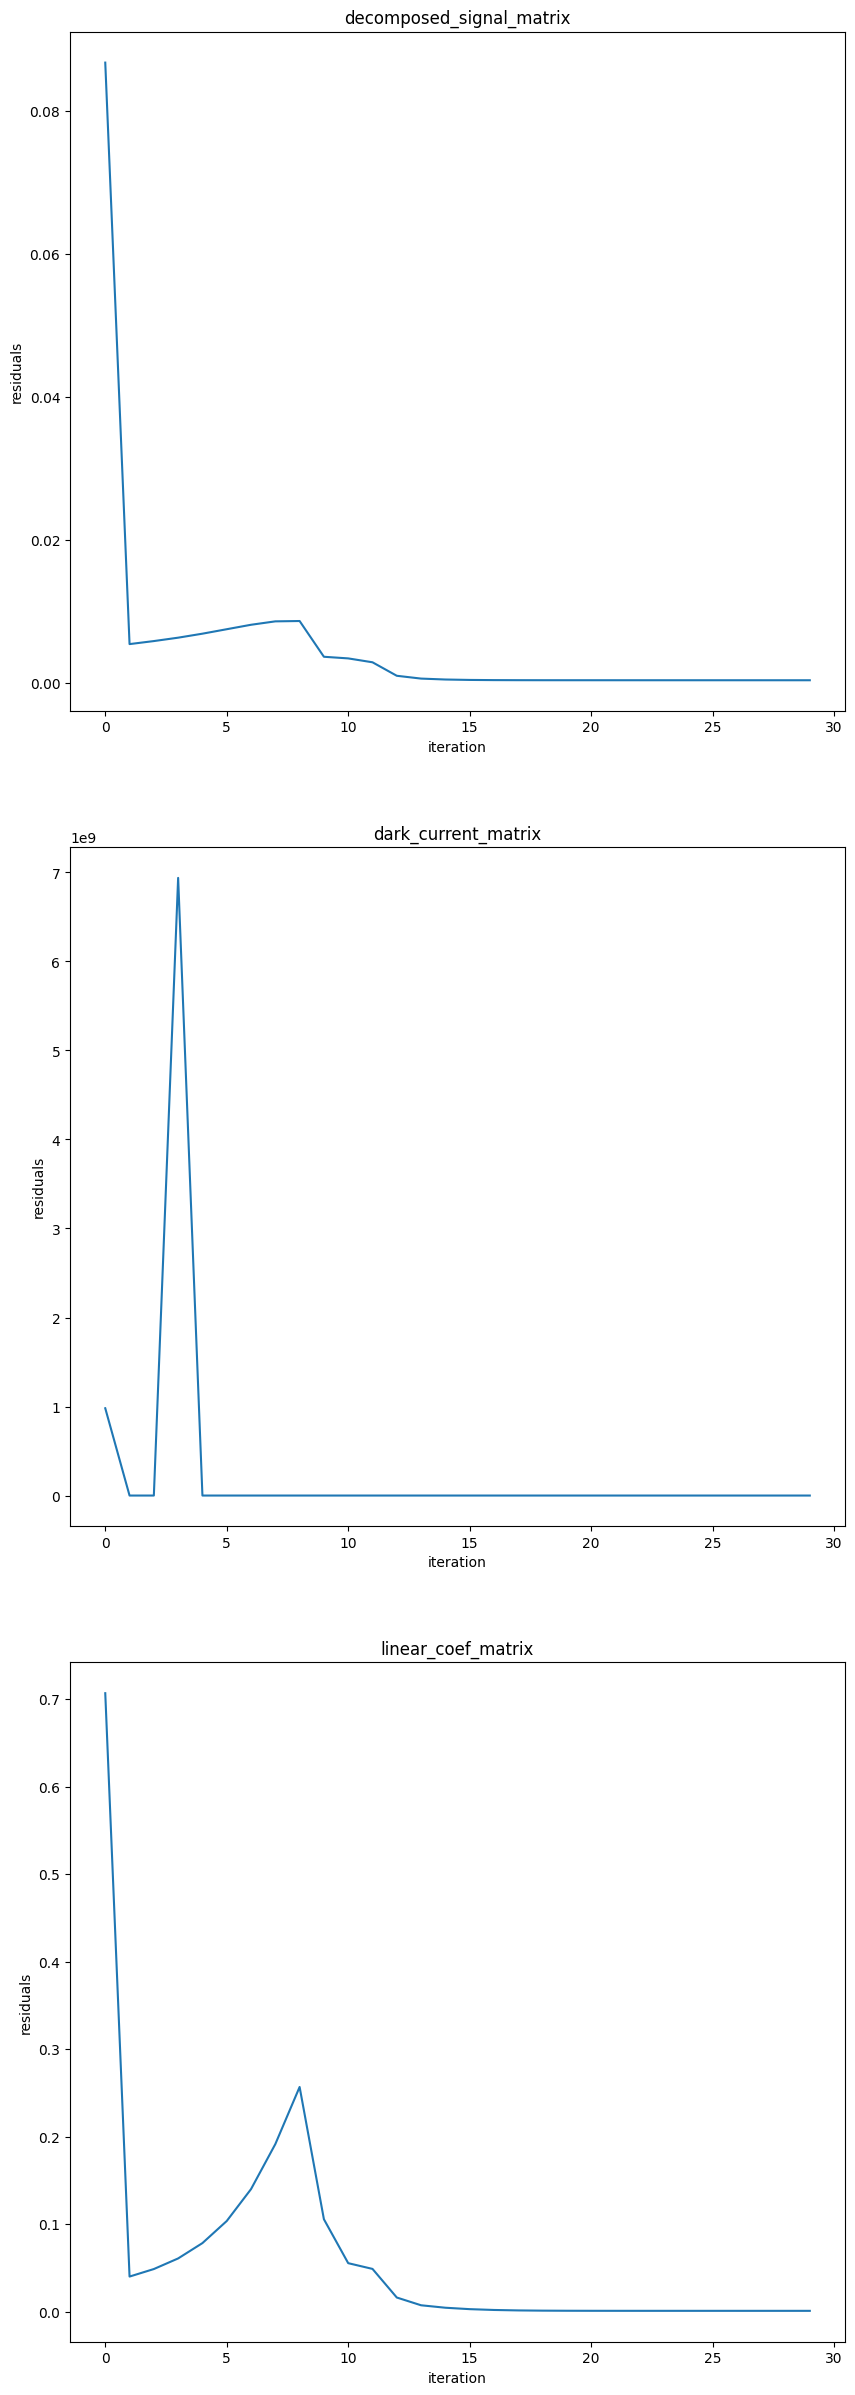

In [13]:
fig = plt.figure(figsize=(10,30))
a = fig.subplots(3,1)

for key, ax in zip(residuals.keys(), a) :
    data = residuals[key]
    ax.plot(
        np.arange(len(data)),
        data
    )
    
    ax.set_title(key)
    ax.set_xlabel("iteration")
    ax.set_ylabel("residuals")